In [12]:
import numpy as np
import pandas as pd
import nltk

In [2]:
amazon = pd.read_csv('amazon_reviews_big.csv')

In [7]:
print(amazon.shape)
amazon.head()

(100000, 8)


,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09


In [20]:
!pip install gensim

  Using cached https://files.pythonhosted.org/packages/01/6e/8a8ff9ec36a34dd753c6504cde998c4e0a4e37dcd91e1c9ca4b71960a4f5/gensim-3.6.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/4b/1f/6f27e3682124de63ac97a0a5876da6186de6c19410feab66c1543afab055/smart_open-1.7.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/61/39/122222b5e85cd41c391b68a99ee296584b2a2d1d233e7ee32b4532384f2d/bz2file-0.98.tar.gz
  Using cached https://files.pythonhosted.org/packages/c4/d4/638389536f6d220b3932205298d0cbbc16a34a5aa3f9bf95e33fa0315423/boto3-1.9.74-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d7/14/2a0004d487464d120c9fb85313a75cd3d71a7506955be458eebfe19a6b1d/s3transfer-0.1.13-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b7/31/05c8d001f7f87f0f07289a5fc0fc3832e9a57f2dbd4d3b0fee70e0d51365/jmespath-0.9.3-py2.py3-none-any.whl
  Running setup.py bdist_wheel for gensim: started
  Running setup.py bdist_wheel for gensim: f

In [11]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]', '')  #text cleaning
docs.head()

0    what i recieved is not what is pictured here o...
1    excellent unit and a pretty simple install usi...
2    im enjoying this keyboard im getting another o...
3    overall this is a fantastic camera that im ext...
4    these work very well with mysamsung pnd inch p...
Name: reviewText, dtype: object

In [16]:
docs_clean = []
stopwords = nltk.corpus.stopwords.words('english')
junk_words = []

stopwords.extend(junk_words)

for doc in docs:
    row_words = [word for word in doc.split(' ')if word not in stopwords]
    docs_clean.append(row_words)
    

docs_clean

[['recieved',
  'pictured',
  'advertized',
  'vidio',
  'cable',
  'job',
  'needed',
  'looking',
  'high',
  'quality',
  'cable',
  'buy',
  'product',
  'recieved',
  'cheap',
  'thin',
  'flimsy',
  'cable',
  'gold',
  'plated',
  'anything',
  'else',
  'claim',
  'bait',
  'switch',
  'mistake',
  'order',
  '',
  '',
  'know',
  'attempt',
  'contact',
  'sender',
  'find',
  'contacted',
  'seller',
  'told',
  'contact',
  'amazoncom',
  'amazoncom',
  'good',
  'enough',
  'give',
  '',
  'refund',
  'good',
  'cable',
  'woth',
  '',
  '',
  'needed',
  'run',
  'wifes',
  'kareokee',
  'tv',
  'thing',
  'else',
  'would',
  'sent',
  'back',
  'full',
  'refund',
  'im',
  'surprised',
  'item',
  'still',
  'listed',
  'high',
  'grade',
  'cable'],
 ['excellent',
  'unit',
  'pretty',
  'simple',
  'install',
  'using',
  'wiring',
  'adapter',
  'removal',
  'tools',
  'purchased',
  'kenwood',
  'quality',
  'evident',
  'look',
  'sound',
  'today',
  'bodes',
  'w

In [17]:
len(docs_clean)

100000

In [21]:
import gensim
dictionary = gensim.corpora.Dictionary(docs_clean)

C:\Users\ASHISH\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [22]:
print(dictionary)

Dictionary(176487 unique tokens: ['', 'advertized', 'amazoncom', 'anything', 'attempt']...)


In [23]:
dictionary.token2id['anything']

3

In [25]:
docs_bow = [dictionary.doc2bow(doc) for doc in docs_clean]

In [27]:
docs_bow[0]

[(0, 5),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 5),
 (9, 1),
 (10, 1),
 (11, 2),
 (12, 1),
 (13, 2),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 2),
 (21, 1),
 (22, 2),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 2),
 (38, 2),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1)]

In [29]:
print(dictionary.token2id['anything'])
print(dictionary[3])

3
anything


In [30]:
ldamodel = gensim.models.LdaModel(docs_bow,id2word = dictionary,num_topics = 4)    
ldamodel

lda = latent dichlate addition 

In [32]:
ldamodel.print_topics()

[(0,
  '0.031*"" + 0.019*"camera" + 0.009*"use" + 0.008*"battery" + 0.007*"keyboard" + 0.007*"mouse" + 0.006*"video" + 0.006*"like" + 0.005*"good" + 0.005*"batteries"'),
 (1,
  '0.055*"" + 0.013*"sound" + 0.009*"tv" + 0.008*"good" + 0.008*"great" + 0.008*"cable" + 0.008*"quality" + 0.006*"use" + 0.006*"one" + 0.006*"like"'),
 (2,
  '0.053*"" + 0.013*"case" + 0.010*"one" + 0.008*"like" + 0.008*"well" + 0.007*"lens" + 0.007*"great" + 0.007*"would" + 0.007*"use" + 0.006*"good"'),
 (3,
  '0.082*"" + 0.009*"one" + 0.008*"drive" + 0.007*"usb" + 0.006*"use" + 0.005*"would" + 0.005*"works" + 0.005*"card" + 0.005*"computer" + 0.005*"work"')]

In [33]:
docs_clean = []
stopwords = nltk.corpus.stopwords.words('english')
junk_words = ['','great','works','woulds','get','good','use','like','one']

stopwords.extend(junk_words)

for doc in docs:
    row_words = [word for word in doc.split(' ')if word not in stopwords]
    docs_clean.append(row_words)
    

docs_clean

[['recieved',
  'pictured',
  'advertized',
  'vidio',
  'cable',
  'job',
  'needed',
  'looking',
  'high',
  'quality',
  'cable',
  'buy',
  'product',
  'recieved',
  'cheap',
  'thin',
  'flimsy',
  'cable',
  'gold',
  'plated',
  'anything',
  'else',
  'claim',
  'bait',
  'switch',
  'mistake',
  'order',
  'know',
  'attempt',
  'contact',
  'sender',
  'find',
  'contacted',
  'seller',
  'told',
  'contact',
  'amazoncom',
  'amazoncom',
  'enough',
  'give',
  'refund',
  'cable',
  'woth',
  'needed',
  'run',
  'wifes',
  'kareokee',
  'tv',
  'thing',
  'else',
  'would',
  'sent',
  'back',
  'full',
  'refund',
  'im',
  'surprised',
  'item',
  'still',
  'listed',
  'high',
  'grade',
  'cable'],
 ['excellent',
  'unit',
  'pretty',
  'simple',
  'install',
  'using',
  'wiring',
  'adapter',
  'removal',
  'tools',
  'purchased',
  'kenwood',
  'quality',
  'evident',
  'look',
  'sound',
  'today',
  'bodes',
  'well',
  'future',
  'extra',
  'stuff',
  'really'

In [34]:
ldamodel.print_topics()

[(0,
  '0.031*"" + 0.019*"camera" + 0.009*"use" + 0.008*"battery" + 0.007*"keyboard" + 0.007*"mouse" + 0.006*"video" + 0.006*"like" + 0.005*"good" + 0.005*"batteries"'),
 (1,
  '0.055*"" + 0.013*"sound" + 0.009*"tv" + 0.008*"good" + 0.008*"great" + 0.008*"cable" + 0.008*"quality" + 0.006*"use" + 0.006*"one" + 0.006*"like"'),
 (2,
  '0.053*"" + 0.013*"case" + 0.010*"one" + 0.008*"like" + 0.008*"well" + 0.007*"lens" + 0.007*"great" + 0.007*"would" + 0.007*"use" + 0.006*"good"'),
 (3,
  '0.082*"" + 0.009*"one" + 0.008*"drive" + 0.007*"usb" + 0.006*"use" + 0.005*"would" + 0.005*"works" + 0.005*"card" + 0.005*"computer" + 0.005*"work"')]

In [40]:
amazon.loc[900,'reviewText']

"I bought this radio a long time ago because I need something small to take to hockey games. This radio works great its really portable and easy to use. Just get some rechargeable batteries and you'll be good."

In [35]:
ldamodel.get_document_topics(docs_bow[0])

[(1, 0.4459982), (3, 0.5465331)]

In [36]:
ldamodel.get_document_topics(docs_bow[100])   #multitaggin

[(0, 0.025698418), (1, 0.026051098), (2, 0.9221777), (3, 0.026072824)]

In [37]:
ldamodel.get_document_topics(docs_bow[300])

[(0, 0.14776193), (1, 0.11821978), (2, 0.24206519), (3, 0.49195307)]

In [38]:
ldamodel.get_document_topics(docs_bow[900])

[(0, 0.35569155), (1, 0.55875486), (2, 0.0745458), (3, 0.011007795)]

In [39]:
ldamodel.get_document_topics(docs_bow[600])

[(2, 0.122109525), (3, 0.8755814)]

In [41]:
ldamodel.get_document_topics(docs_bow[9002])

[(1, 0.8949496), (3, 0.09765129)]

In [42]:
amazon.loc[9002,'reviewText']

'I bought the Alpine MRV-M500 Mono subwoofer amplifier and this to accompany it.  When I first wired this knob up and plugged it in I did not hear any difference even if I turned the knob all of the way to max.  I checked the boost setting on my amp and it was set pretty low.  I then realized, through trial and error, that you have to put your &#34;Base EQ&#34; on +12dB (MAX) and then you use this knob as a &#34;dimmer.&#34;  When this is all the way to the right then you are at +12 and then when you turn back you are lowering from +12.  If you had the Base EQ set to +5 then when this knob is maxed out you are at +5.  This knob does not override Base EQ.  Once I figured this out I really like having this.  Great addition to applicable Alpine amps.'

In [43]:
ldamodel = gensim.models.LdaModel(docs_bow,id2word = dictionary,num_topics = 4)    
ldamodel

In [49]:
topics =[]

for doc_bow in docs_bow:
    topic = pd.DataFrame(ldamodel.get_document_topics(doc_bow),
                        columns = ['topic','prob']).sort_values(
                        'prob').tail(1)['topic'].values[0]
    topics.append(topic)
topics[:5]

[2, 2, 1, 3, 1]

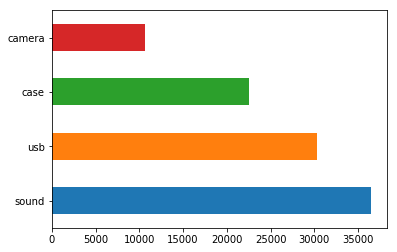

In [51]:
%matplotlib inline
amazon['topic_number'] = topics
amazon['topic'] = amazon['topic_number'].replace({0: 'camera',1: 'sound',
                                                  2: 'usb', 3: 'case'})
amazon['topic'].value_counts().plot.barh()

In [52]:
for topic_number in range(4):
    ldamodel.get_topic_terms(topic_number)
    

In [62]:
ldamodel.get_topic_terms(0)

[(0, 0.0403635),
 (975, 0.008822005),
 (108, 0.0062868902),
 (72, 0.005986513),
 (84, 0.0058832136),
 (141, 0.0057573435),
 (2433, 0.005678672),
 (218, 0.0055006193),
 (107, 0.0042918595),
 (1810, 0.004229283)]

In [63]:
df_topic2word = pd.DataFrame()
for topic_number in range(4):
    df = pd.DataFrame(ldamodel.get_topic_terms(topic_number),
                     columns = ['wordid','prob'])
    df['word'] = df['wordid'].apply(lambda v : dictionary[v])
    df['topic'] = topic_number
    df_topic2word = df_topic2word.append(df,ignore_index = True)
    

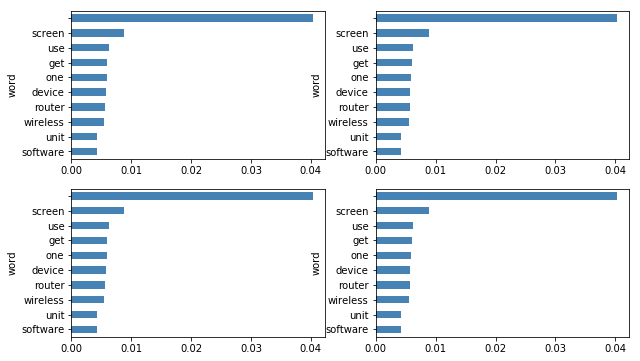

In [64]:
import matplotlib.pyplot as plt
df_topic2word.index = df_topic2word['word']
fig,axs = plt.subplots(2,2)

df_topic2word[df_topic2word['topic']==0]['prob'][::-1].plot.barh(color = 'steelblue',ax = axs[0,0],figsize = (10,6))
df_topic2word[df_topic2word['topic']==0]['prob'][::-1].plot.barh(color = 'steelblue',ax = axs[0,1])
df_topic2word[df_topic2word['topic']==0]['prob'][::-1].plot.barh(color = 'steelblue',ax = axs[1,0])
df_topic2word[df_topic2word['topic']==0]['prob'][::-1].plot.barh(color = 'steelblue',ax = axs[1,1])


In [65]:
df_topic2word

,wordid,prob,word,topic
word,,,,
,0,0.040364,,0
screen,975,0.008822,screen,0
use,108,0.006287,use,0
get,72,0.005987,get,0
one,84,0.005883,one,0
device,141,0.005757,device,0
router,2433,0.005679,router,0
wireless,218,0.005501,wireless,0
unit,107,0.004292,unit,0


## Twitter Scraping

In [ ]:
consumer_api = ''
consumer_api_Secret = ''

access_token = ''
access_secret = ''

In [66]:
#!pip install tweepy

In [67]:
import tweepy

In [ ]:
auth = tweepy.OAuthHandler(consumer_api,consumer_api_secret)
auth.set_accsess-token(access-token ,access_secret)
api = tweepy.API(auth)

In [ ]:
datascience = api.search('#datascience',count = 100)
len(datascience)

In [ ]:
flipkart = api.search('#flipkart',count = 1000)
len(flipkart)

In [ ]:
type(flipkart[0])

In [ ]:
for res in flipkart:
    text = res.text
    date = res.created_at
    screen_name = res.user.screen_name
    name = res.user.name
    
    curr_row  = {'text':text,
                'date' : date,
                'screen_name' : screen_name,
                'name' : name}
    tweets_flipkart = tweets_flipkart.append(curr_row,ignore_index = True)

tweets_flipkart